In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [6]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [7]:
df=pd.read_csv('crx.data')

In [8]:
print(df.shape)

(689, 16)


In [9]:
print(df.dtypes)

b         object
30.83     object
0        float64
u         object
g         object
w         object
v         object
1.25     float64
t         object
t.1       object
01         int64
f         object
g.1       object
00202     object
0.1        int64
+         object
dtype: object


In [10]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)


['0' '1.25' '01' '0.1']


In [11]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


['b' '30.83' 'u' 'g' 'w' 'v' 't' 't.1' 'f' 'g.1' '00202' '+']


In [13]:
df.columns = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']

In [14]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


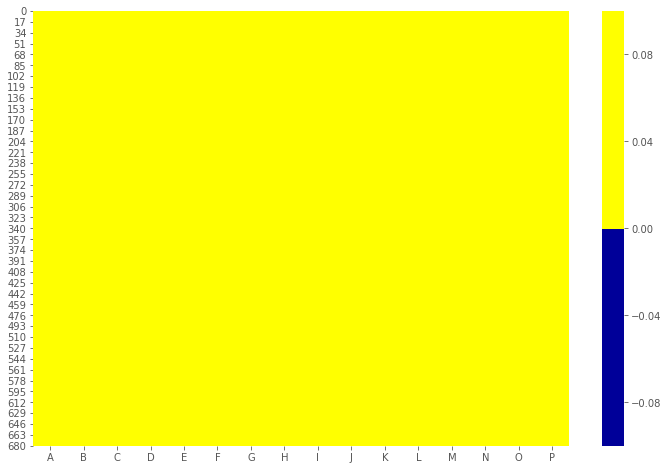

In [18]:
cols = df.columns[:16] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [19]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

A - 0.0%
B - 0.0%
C - 0.0%
D - 0.0%
E - 0.0%
F - 0.0%
G - 0.0%
H - 0.0%
I - 0.0%
J - 0.0%
K - 0.0%
L - 0.0%
M - 0.0%
N - 0.0%
O - 0.0%
P - 0.0%


In [20]:
missingval = (df[['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']] == '?').sum()

print(missingval)

A    12
B    12
C     0
D     6
E     6
F     9
G     9
H     0
I     0
J     0
K     0
L     0
M     0
N    13
O     0
P     0
dtype: int64


C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [21]:
from numpy import nan
df[['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']] = df[['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']].replace('?', nan)

In [22]:
df['P']=df['P'].replace(['-','+'], [0,1]).astype('int')

In [23]:
missingval = (df[['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']] == '?').sum()

print(missingval)

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
dtype: int64


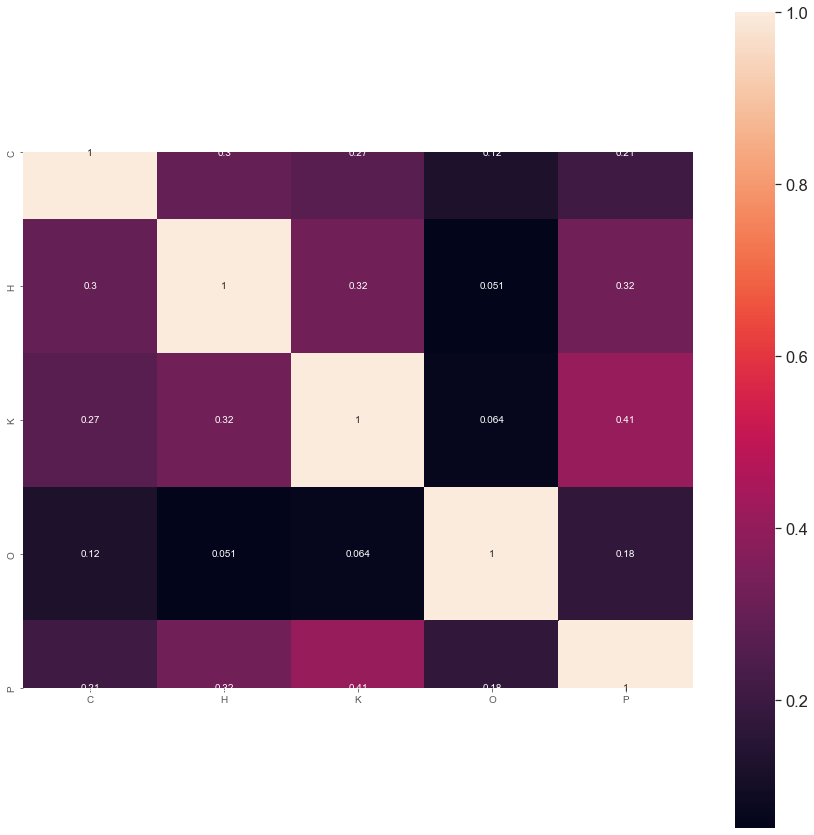

In [28]:
fig = plt.subplots(figsize = (15,15))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()


In [30]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(df['A'])
df['A'] = imputer.transform(df['A'])

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: could not convert string to float: 'a'

In [32]:
#we need to use categorical imputer since string values
!pip install sklearn_pandas

In [33]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

data = [
    ['a', 1, 2],
    ['b', 1, 1],
    ['b', 2, 2],
    [np.nan, np.nan, np.nan]
]

X = pd.DataFrame(data)
xt = DataFrameImputer().fit_transform(X)

print('before...')
print(X)
print('after...')
print(xt)

before...
     0    1    2
0    a  1.0  2.0
1    b  1.0  1.0
2    b  2.0  2.0
3  NaN  NaN  NaN
after...
   0         1         2
0  a  1.000000  2.000000
1  b  1.000000  1.000000
2  b  2.000000  2.000000
3  b  1.333333  1.666667


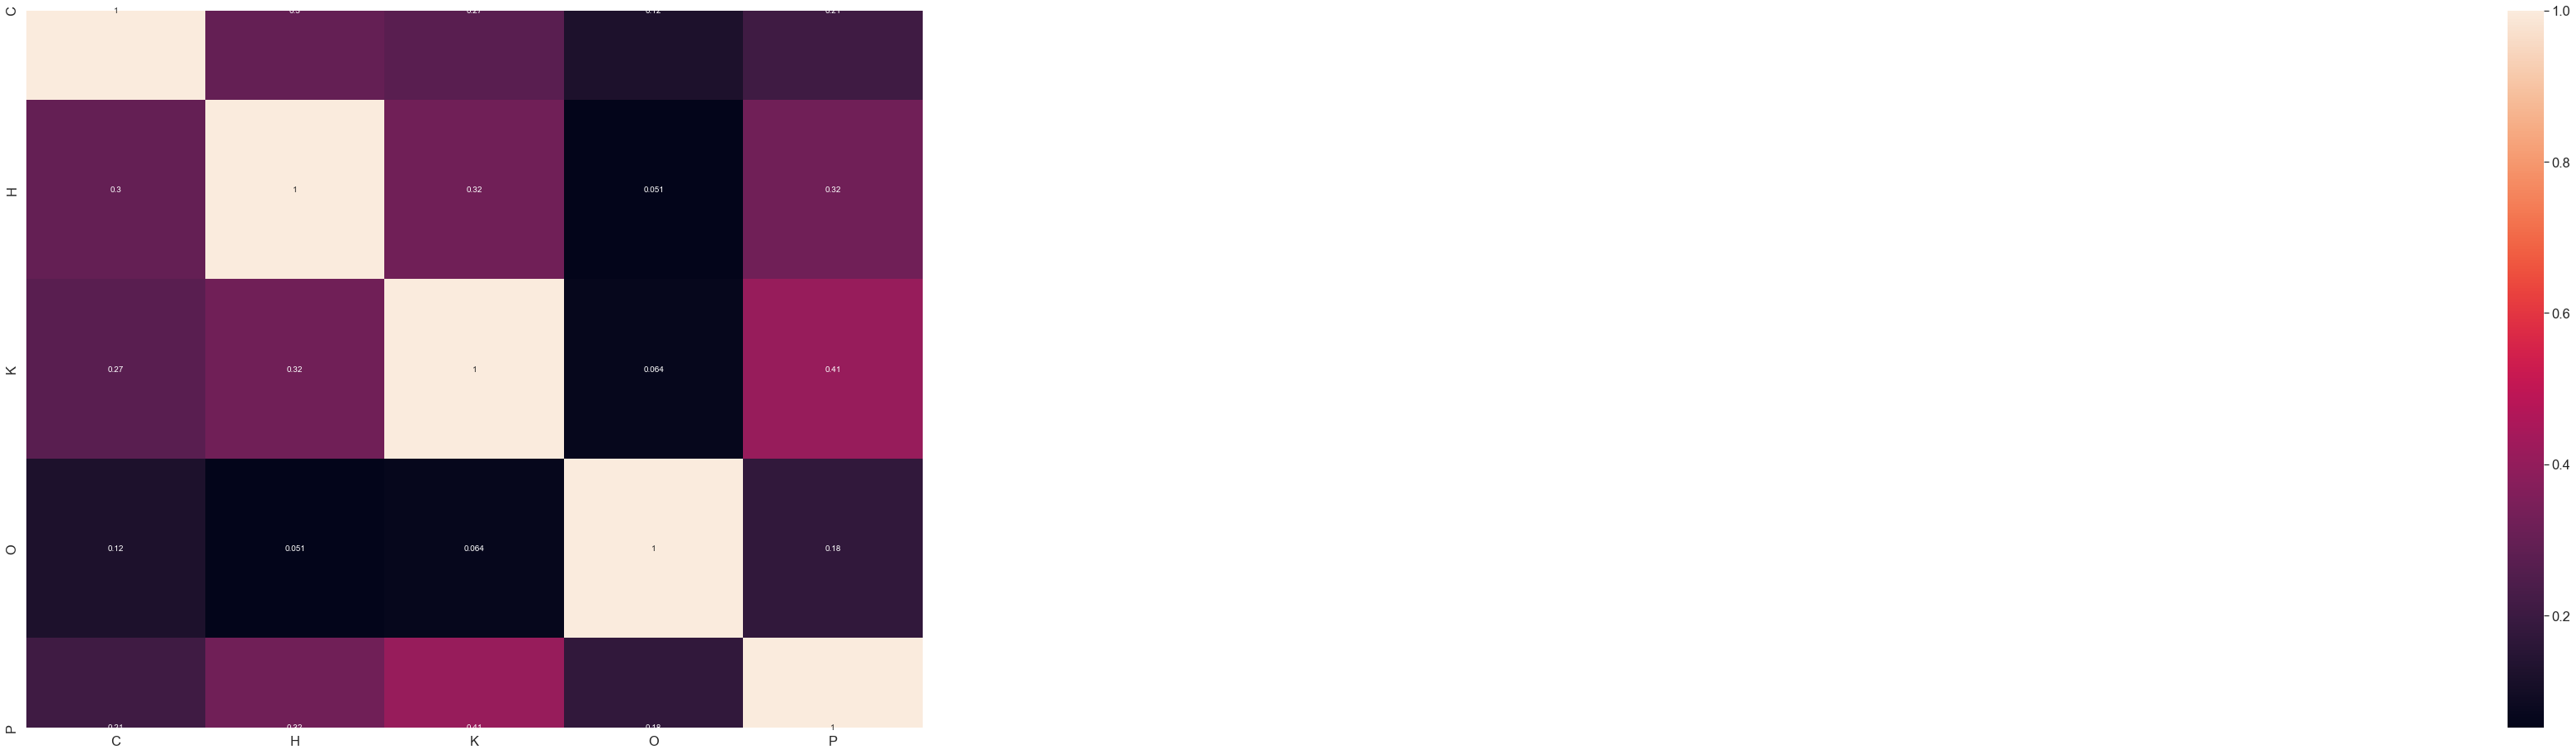

In [35]:
fig = plt.subplots(figsize = (689,16))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [37]:
from sklearn_pandas import CategoricalImputer
data = np.array(df['A'], dtype=object)
imputer = CategoricalImputer()
df['A']=imputer.fit_transform(data)

data = np.array(df['B'], dtype=object)
imputer = CategoricalImputer()
df['B']=imputer.fit_transform(data)

data = np.array(df['D'], dtype=object)
imputer = CategoricalImputer()
df['D']=imputer.fit_transform(data)

data = np.array(df['E'], dtype=object)
imputer = CategoricalImputer()
df['E']=imputer.fit_transform(data)

data = np.array(df['F'], dtype=object)
imputer = CategoricalImputer()
df['F']=imputer.fit_transform(data)

data = np.array(df['G'], dtype=object)
imputer = CategoricalImputer()
df['G']=imputer.fit_transform(data)

data = np.array(df['N'], dtype=object)
imputer = CategoricalImputer()
df['N']=imputer.fit_transform(data)

In [40]:
df['A']=df['A'].replace(['a','b'], [0,1]).astype('int')
df['D']= df['D'].replace(['u','y','l','t'], [0,1,2,3]).astype('int')
df['E']=df['E'].replace(['g','p','gg'], [0,1,2]).astype('int')
df['F']=df['F'].replace(['c', 'd', 'cc', 'i', 'j', 'k', 'm', 'r', 'q', 'w', 'x', 'e', 'aa', 'ff'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13]).astype('int')
df['G']=df['G'].replace(['v', 'h', 'bb', 'j', 'n', 'z', 'dd', 'ff', 'o'], [0,1,2,3,4,5,6,7,8]).astype('int')
df['I']=df['I'].replace(['t','f'], [0,1]).astype('int')
df['J']=df['J'].replace(['t','f'], [0,1]).astype('int')
df['L']=df['L'].replace(['t','f'], [0,1]).astype('int')
df['M']=df['M'].replace(['g','p','s'], [0,1,2]).astype('int')
df.head()
                                                      
                                                      
    
          

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,0,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,00043,560,1
1,0,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,00280,824,1
2,1,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,00100,3,1
3,1,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,00120,0,1
4,1,32.08,4.000,0,0,6,0,2.50,0,1,0,0,0,00360,0,1


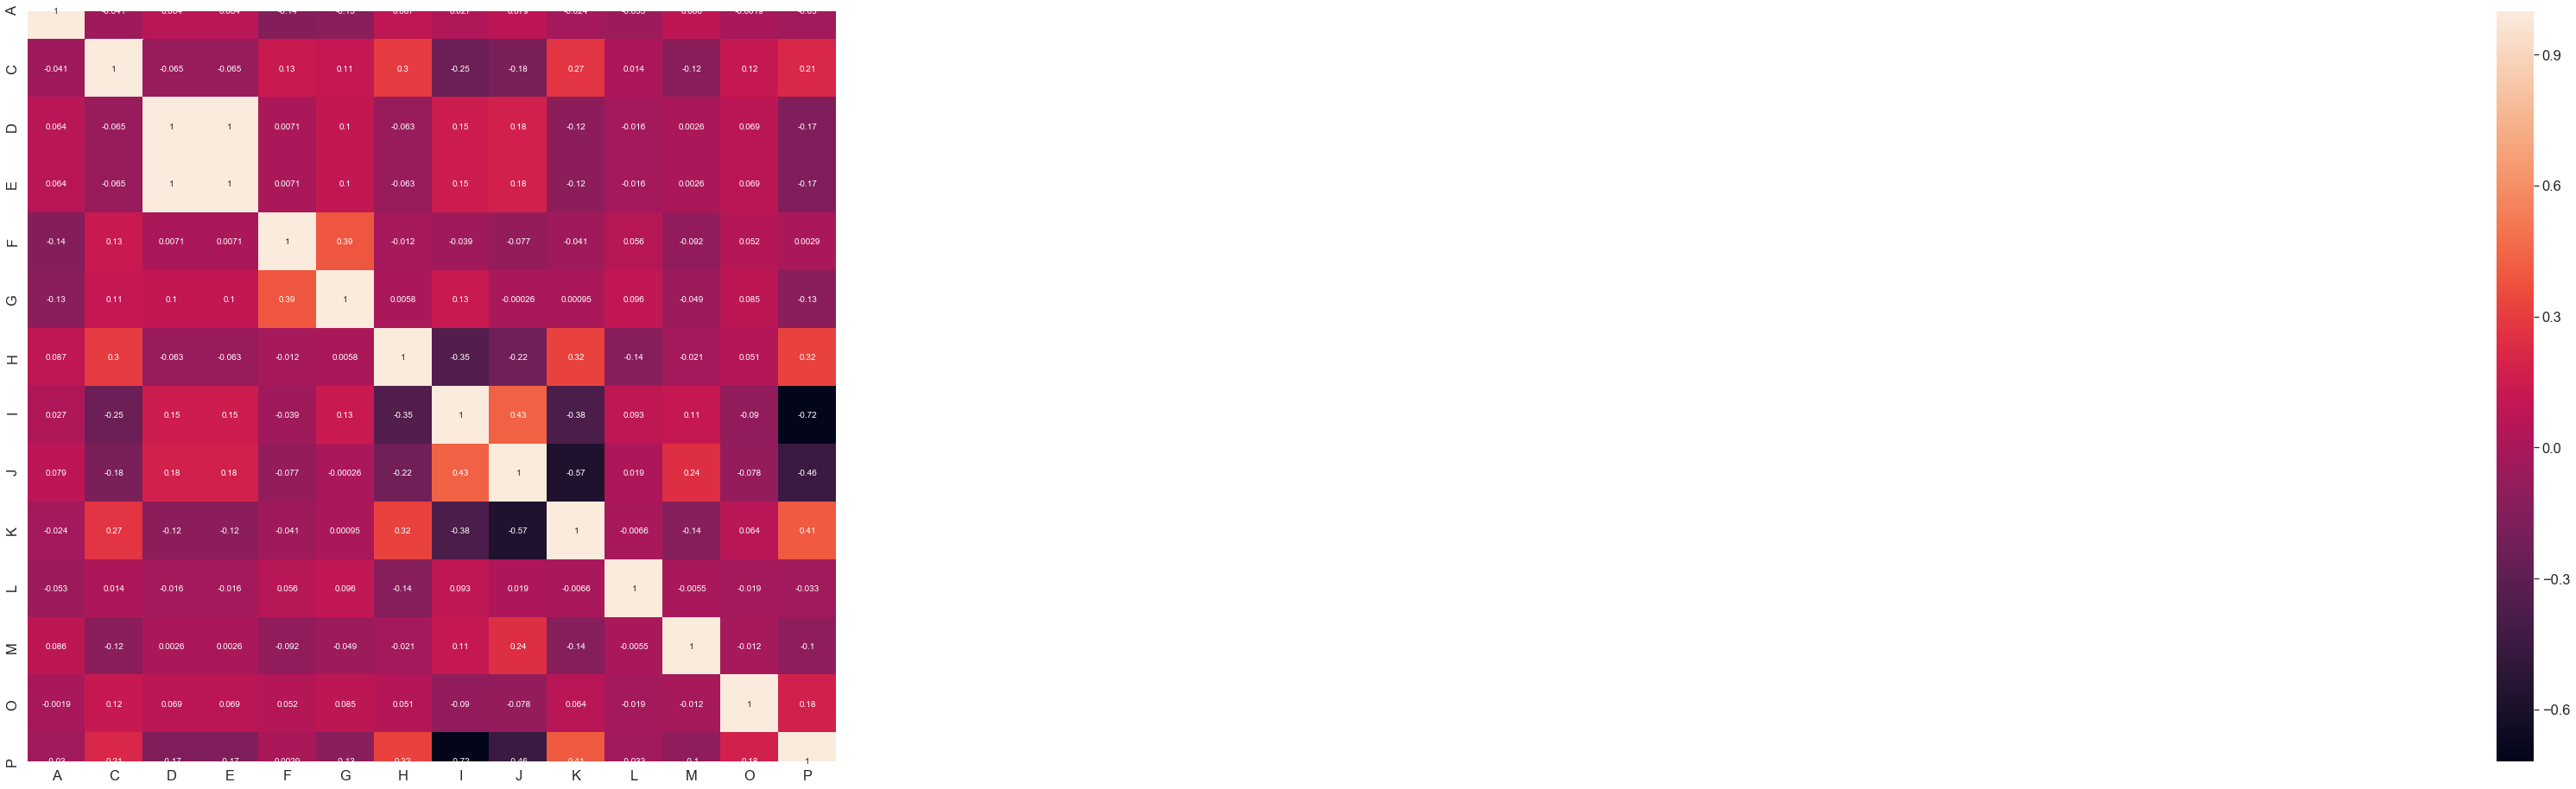

In [41]:
fig = plt.subplots(figsize = (689,16))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()